## Obtain news article

In [1]:
%pip install -r requirements.txt 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import matplotlib.pyplot as plt

In [11]:
# Import packages
# Default packages
import time
import csv
import os
import json


# Preinstalled packages
import requests
import pandas as pd

# URL of our News API
base_url = 'https://api.newscatcherapi.com/v2/search?lang=en'

# Your API key
X_API_KEY = 'YHBKmAH0DbzXSs_h7be46br_kfw3EhBcqXPtCTSg1Qc'

In [6]:
# Put your API key to headers in order to be authorized to perform a call
headers = {'x-api-key': X_API_KEY}
# Define your desired parameters
# params = [
#     {
#         'q': 'Bitcoin',
#         'lang': 'en',
#         'to_rank': 10000,
#         'topic': "business",
#         'page_size': 100,
#         'page': 1,
#         'from' : "2015/01/01",
#         'to': "2019/12/31"
#     }
# ]

params = [
    {
        'q': 'Bitcoin',
        'lang': 'en',
        'to_rank': 10000,
        'topic': "business",
        'page_size': 100,
        'page': 1
    }
]



In [7]:
# Variable to store all found news articles, mp stands for "multiple queries"
all_news_articles_mp = []

# Infinite loop which ends when all articles are extracted
for separated_param in params:

    print(f'Query in use => {str(separated_param)}')
    
    while True:
        # Wait for 1 second between each call
        time.sleep(1)

        # GET Call from previous section enriched with some logs
        response = requests.get(base_url, headers=headers, params=separated_param)
        results = json.loads(response.text.encode())
        if response.status_code == 200:
            print(f'Done for page number => {separated_param["page"]}')


            # Adding your parameters to each result to be able to explore afterwards
            for i in results['articles']:
                i['used_params'] = str(separated_param)


            # Storing all found articles
            all_news_articles_mp.extend(results['articles'])

            # Ensuring to cover all pages by incrementing "page" value at each iteration
            separated_param['page'] += 1
            if separated_param['page'] > results['total_pages']:
                print("All articles have been extracted")
                break
            else:
                print(f'Proceed extracting page number => {separated_param["page"]}')
        else:
            print(results)
            print(f'ERROR: API call failed for page number => {separated_param["page"]}')
            break

Query in use => {'q': 'Bitcoin', 'lang': 'en', 'to_rank': 10000, 'topic': 'business', 'page_size': 100, 'page': 1}
Done for page number => 1
Proceed extracting page number => 2
Done for page number => 2
All articles have been extracted


In [8]:
print(f'Number of extracted articles => {str(len(all_news_articles_mp))}')

Number of extracted articles => 126


In [9]:
# Define variables
unique_ids = []
all_news_articles = []

# Iterate on each article and check whether we saw this _id before
for article in all_news_articles_mp:
    if article['_id'] not in unique_ids:
        unique_ids.append(article['_id'])
        all_news_articles.append(article)

In [12]:
# Import data into pandas
pandas_table = pd.DataFrame(all_news_articles)

In [13]:
pandas_table.head()

,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,rank,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id,used_params
0,Bitcoin phone home: Use crypto to buy sim card...,Joe Hall,2023-08-08 12:55:00,full,https://cointelegraph.com/news/bitcoin-crypto-...,cointelegraph.com,A partnership between crypto marketplace Bitre...,A partnership between crypto e-commerce platfo...,cointelegraph.com,1696,business,US,en,Joe Hall,https://images.cointelegraph.com/images/1200_a...,False,@cointelegraph,11.269115,2e408dca78827908b28d0c6263a5d6b9,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
1,I write about the rapidly evolving VC and star...,Kjartan Rist,2023-08-10 13:31:17,full,https://www.forbes.com/sites/kjartanrist/2023/...,forbes.com,Is bitcoin finally breaking free of its associ...,The hype around the bitcoin price rollercoaste...,Copyright 2023 Forbes Media LLC,49,business,US,en,Kjartan Rist,https://imageio.forbes.com/specials-images/ima...,False,@forbes,11.244278,3c007d57c54e73306f8151687f3dc507,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
2,"Speed Launches Magento Plugin, Simplifying Bit...",Jay Patel,2023-08-08 14:00:00,full,https://www.einnews.com/pr_news/647944000/spee...,einnews.com,Speed Launches Magento Plugin: Revolutionizing...,Speed Bitcoin Payment Processor\n\nSpeed Launc...,einnews.com,3825,business,UA,en,"EIN News,Jay Patel",https://img.einnews.com/ampsize/515125/speed-b...,False,@einnews,11.229992,3b068f1da08f78cf0742e1f9e77f2a5e,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
3,Leak Reveals BlackRock's Game-Changing Bitcoin...,Billy Bambrough,2023-08-09 22:45:24,full,https://www.forbes.com/sites/digital-assets/20...,forbes.com,"Bitcoin, ethereum and other cryptocurrencies w...","Bitcoin BTC, ethereum and other cryptocurrenci...",Copyright 2023 Forbes Media LLC,49,business,US,en,"Billy Bambrough,Senior Contributor",https://imageio.forbes.com/specials-images/ima...,False,@billybambrough,11.225713,ec6029fd5cc4a6ffa0ff4e2633d33b21,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
4,The deadline for a ruling on Ark's application...,Bob Pisani,2023-08-07 12:30:00,timezone unknown,https://www.nbcphiladelphia.com/news/business/...,nbcphiladelphia.com,The SEC is required to give a thumbs up or thu...,It's put up or shut up time for the SEC on a b...,nbcphiladelphia.com,4181,business,US,en,"Bob Pisani,Bob Pisani Cnbc,CNBC",https://media.nbcphiladelphia.com/2023/08/1072...,False,@nbcphiladelphia,11.220424,b406883f25fa7ed168ccc79217cdc176,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."


In [18]:
pandas_table['title'][2]

'Speed Launches Magento Plugin, Simplifying Bitcoin Payments for E-Commerce Stores'

In [24]:
df = pandas_table[['title']]
df.head()

C:\Users\Computing\AppData\Local\Temp\ipykernel_13920\4279448406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'text':'headline'}, inplace = True)


,title
0,Bitcoin phone home: Use crypto to buy sim card...
1,I write about the rapidly evolving VC and star...
2,"Speed Launches Magento Plugin, Simplifying Bit..."
3,Leak Reveals BlackRock's Game-Changing Bitcoin...
4,The deadline for a ruling on Ark's application...


In [21]:
df.shape

(126, 1)

In [22]:
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (126, 1)


In [23]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0        title              0              0.0


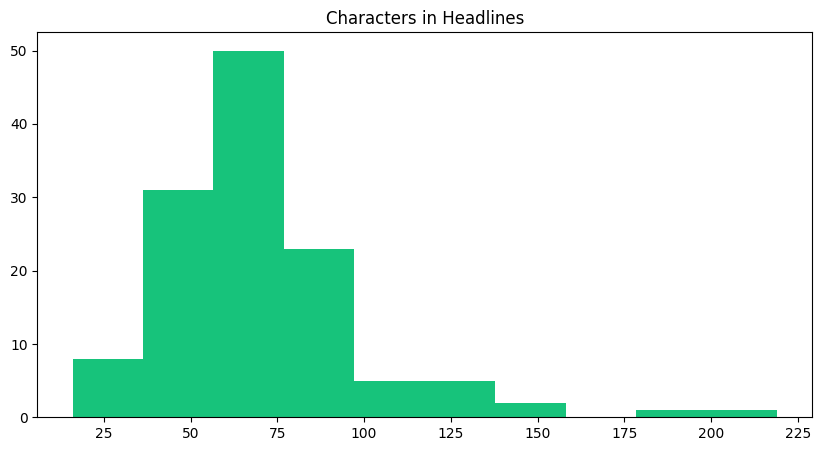

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

headline_length = pandas_table['title'].str.len()
ax.hist(headline_length, color='#17C37B')
ax.set_title('Characters in Headlines')

plt.show()

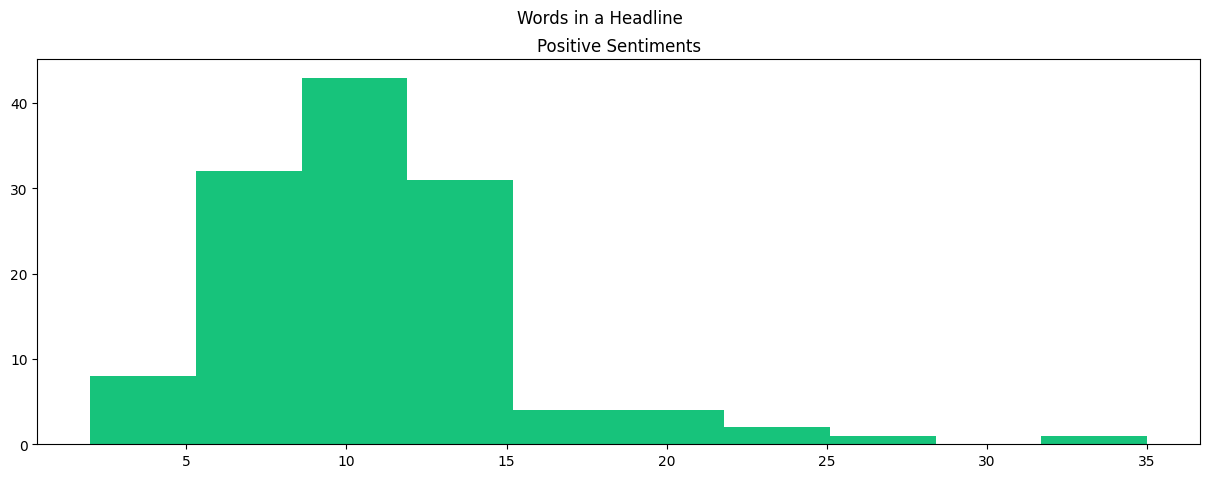

In [33]:
fig,(ax1)=plt.subplots(figsize=(15,5))

headline_length=pandas_table['title'].str.split().map(lambda x: len(x))
ax1.hist(headline_length,color='#17C37B')
ax1.set_title('Positive Sentiments')

fig.suptitle('Words in a Headline')
plt.show()

In [ ]:
fig,(ax1)=plt.subplots(figsize=(15,5))

headline_length=pandas_table['title'].str.split().apply(lambda x : [len(i) for i in x])
ax1.hist(headline_length,color='#17C37B')
ax1.set_title('Headline')

fig.suptitle('Average word length in each Headline')
plt.show()

In [14]:
pandas_table.to_csv('extracted_news_articles.csv', encoding='utf-8', sep=',')